<img height="90px" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Moir%C3%A9_pattern.svg" align="left" hspace="20px" vspace="0px">

<h1>This is my undergraduate thesis on Morie 3D reconstruction!</h1>

I will simulate the digital fringe projection and picture acquisition with 3Ds Max since I don't have any access to a real camera and projector. Lame School!



*   Project the fringe pattern in the simulating enviroment
*   Capture the images according to different phase detection algorithms in the simulation
*   Explore various phase detection and unwraping algorithms
*  Contrast and Evaluate their performances


## SetUp


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import morie
import imageio
from mpl_toolkits.mplot3d import Axes3D



---

# Generating the Fringe Pattern for Projection

## generate the fringe pattern at phase of 0, -2/3 pi  , 2/3 pi with the morie.py

In [3]:
morie = morie.Morie()
morie.generate_pattern(wavelength=10, phase=np.pi * 2 / 3)
morie.generate_pattern(wavelength=10, phase=0)
morie.generate_pattern(wavelength=10, phase=-np.pi * 2 / 3)

Pattern with the filename ---- w1024_h728_50_200_wl10_p2.0943951023931953.png is already generated!
Pattern with the filename ---- w1024_h728_50_200_wl10_p0.png is already generated!
Pattern with the filename ---- w1024_h728_50_200_wl10_p-2.0943951023931953.png is already generated!


<div>
<img src=".\Patterns\w1024_h728_50_200_wl10_p0.png" width=100 height="100">
<img src=".\Patterns\w1024_h728_50_200_wl10_p2.0943951023931953.png" width=100 height="100">
<img src=".\Patterns\w1024_h728_50_200_wl10_p-2.0943951023931953.png" width=100 height="100">
</div>

# Phase Extraction
## non-digital phase shifting
<div>
<img src=".\Experiments\Ex 3D reconstruction\pic\ph0.png" width=200 height="200">
<img src=".\Experiments\Ex 3D reconstruction\pic\ph-posi.png" width=200 height="200">
<img src=".\Experiments\Ex 3D reconstruction\pic\ph-neg.png" width=200 height="200">
</div>

In [4]:
phase_negative = imageio.imread(r".\Experiments\Ex 3D reconstruction\pic\ph-neg.png")
phase_zero = imageio.imread(r".\Experiments\Ex 3D reconstruction\pic\ph0.png")
phase_positive = imageio.imread(r".\Experiments\Ex 3D reconstruction\pic\ph-posi.png")

## grayscale

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
                  
ph_neg = rgb2gray(phase_negative)
ph_zero = rgb2gray(phase_zero)
ph_pos = rgb2gray(phase_positive)

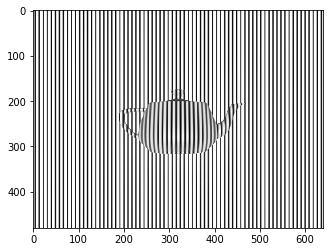

In [6]:
plt.imshow(ph_neg, cmap=plt.get_cmap('gray') )

In [7]:
phase_map = np.arctan(np.sqrt(3) * (ph_neg - ph_pos) / (2 * ph_zero - ph_neg - ph_pos))

(480, 640)


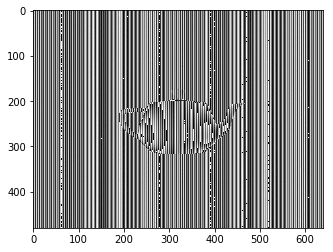

In [8]:
plt.imshow(phase_map, cmap=plt.get_cmap('gray'))
print(phase_map.shape)

NameError: name 'phase_map' is not defined

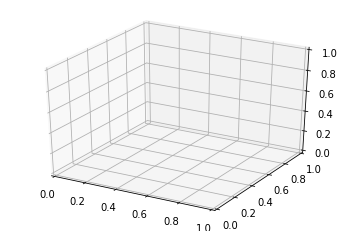

In [3]:
nx, ny = 640, 480
x = range(nx)
y = range(ny)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, phase_map)